In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('places.csv')
df

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
0,1,1,বাদলপাড়া (পশ্চিম),Bangladesh,24.0518,89.1778,https://www.google.com/maps/vt/data=Eb3EEOUdHQ...,Historical landmark,11277077186148385091,Atghoria,historical places,NaN,NaN
1,2,2,বাদলপাড়া (পূর্ব),Bangladesh,24.0481,89.1817,https://www.google.com/maps/vt/data=RPJAmOkoUn...,Historical landmark,16459020165021128639,Atghoria,historical places,5.0,1.0
2,3,3,Kalibari Botgach,38XP+84Q,24.0983,89.3354,https://www.google.com/maps/vt/data=N7OAB5zAfC...,Historical place,2351369166351746719,Atghoria,historical places,2.3,7.0
3,4,4,Abdullah House,Bangladesh,24.2182,89.1794,https://lh5.googleusercontent.com/p/AF1QipO1JK...,Historical landmark,4501074247934495919,Atghoria,historical places,NaN,NaN
4,5,5,বাদলপাড়া (দক্ষিণ),Bangladesh,24.0458,89.1786,https://www.google.com/maps/vt/data=cke8kwb6-r...,Historical landmark,14833493039539550355,Atghoria,historical places,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13851,13852,6,সামাদ বাগান গেইট,VCMJ+W9F,24.8848,92.4309,https://www.google.com/maps/vt/data=KlQsJCA4Aq...,Tourist attraction,16001222133479626905,Zakiganj,tourist places,2.0,1.0
13852,13853,7,মেসার্স সাইমা ফার্মেসী,"ঈদগাহ বাজার, মেইন রোড",24.8942,92.3370,https://www.google.com/maps/vt/data=-D9jSqSMAd...,Tourist attraction,13616155051006738111,Zakiganj,tourist places,NaN,NaN
13853,13854,8,India View,V8VV+WQH,24.8948,92.3445,https://lh5.googleusercontent.com/p/AF1QipMmU_...,Tourist attraction,5437753112283764074,Zakiganj,tourist places,2.7,6.0
13854,13855,9,শিংলাফুয়া হাউজ,X96Q+3V7,24.9602,92.3897,https://www.google.com/maps/vt/data=4v6-CoF8K5...,Tourist attraction,15932006156067024314,Zakiganj,tourist places,5.0,1.0


<Axes: xlabel='longitude', ylabel='latitude'>

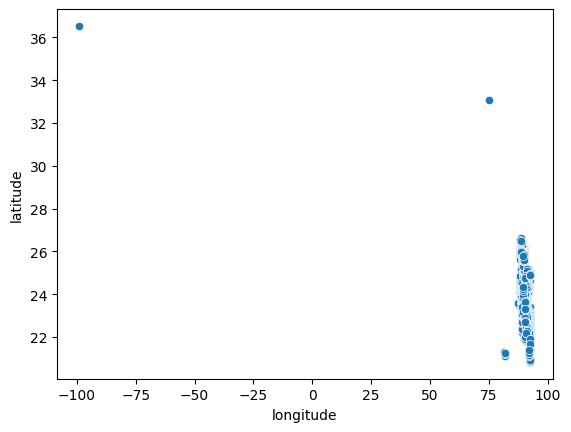

In [130]:
sns.scatterplot(y = 'latitude', x = 'longitude', data = df)

<Axes: ylabel='latitude'>

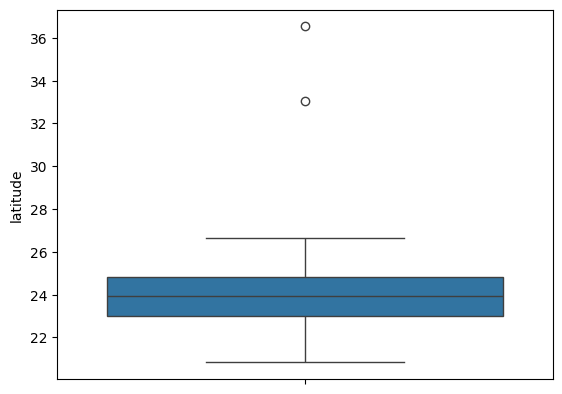

In [131]:
sns.boxplot(df['latitude'])

<Axes: ylabel='longitude'>

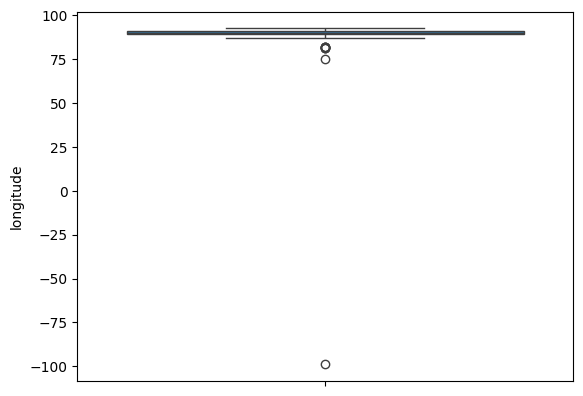

In [132]:
sns.boxplot(df['longitude'])

In [133]:
percentile25 = df['latitude'].quantile(0.25)
percentile75 = df['latitude'].quantile(0.75)

In [134]:
percentile25

22.9893

In [135]:
percentile75

24.8197

In [136]:
iqr = percentile75 - percentile25
iqr

1.830400000000001

In [137]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [138]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 27.5653
Lower limit 20.243699999999997


In [139]:
df[df['latitude'] > upper_limit]

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
3325,3326,9,Panchari Hills Udhampur,"Panchari hills, Panchari, Jammu and Kashmir 18...",33.0653,75.1565,NaN,Historical landmark,500374803487966588,Panchari,historical places,4.2,106.0
5877,5878,7,Little Sahara State Park,"Waynoka, OK",36.5334,-98.8820,https://lh5.googleusercontent.com/p/AF1QipNMFW...,Tourist attraction,5896848260717761972,Domar,point of interest,4.7,878.0


In [140]:
df[df['latitude'] < lower_limit]

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount


In [141]:
new_df = df[df['latitude'] < upper_limit]

<Axes: xlabel='longitude', ylabel='latitude'>

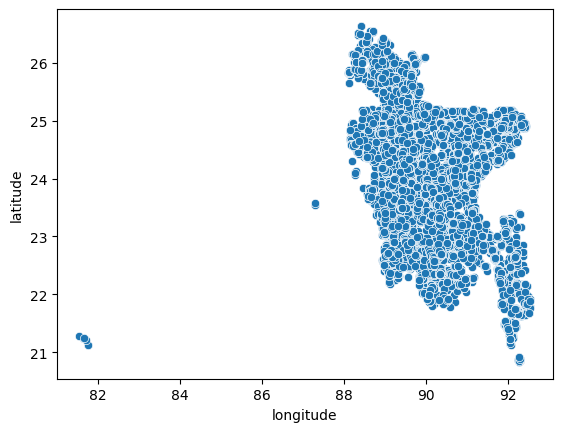

In [142]:
sns.scatterplot(x = 'longitude', y = 'latitude', data = new_df)

In [143]:
new_df = new_df[new_df['latitude'] > lower_limit]
new_df

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
0,1,1,বাদলপাড়া (পশ্চিম),Bangladesh,24.0518,89.1778,https://www.google.com/maps/vt/data=Eb3EEOUdHQ...,Historical landmark,11277077186148385091,Atghoria,historical places,NaN,NaN
1,2,2,বাদলপাড়া (পূর্ব),Bangladesh,24.0481,89.1817,https://www.google.com/maps/vt/data=RPJAmOkoUn...,Historical landmark,16459020165021128639,Atghoria,historical places,5.0,1.0
2,3,3,Kalibari Botgach,38XP+84Q,24.0983,89.3354,https://www.google.com/maps/vt/data=N7OAB5zAfC...,Historical place,2351369166351746719,Atghoria,historical places,2.3,7.0
3,4,4,Abdullah House,Bangladesh,24.2182,89.1794,https://lh5.googleusercontent.com/p/AF1QipO1JK...,Historical landmark,4501074247934495919,Atghoria,historical places,NaN,NaN
4,5,5,বাদলপাড়া (দক্ষিণ),Bangladesh,24.0458,89.1786,https://www.google.com/maps/vt/data=cke8kwb6-r...,Historical landmark,14833493039539550355,Atghoria,historical places,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13851,13852,6,সামাদ বাগান গেইট,VCMJ+W9F,24.8848,92.4309,https://www.google.com/maps/vt/data=KlQsJCA4Aq...,Tourist attraction,16001222133479626905,Zakiganj,tourist places,2.0,1.0
13852,13853,7,মেসার্স সাইমা ফার্মেসী,"ঈদগাহ বাজার, মেইন রোড",24.8942,92.3370,https://www.google.com/maps/vt/data=-D9jSqSMAd...,Tourist attraction,13616155051006738111,Zakiganj,tourist places,NaN,NaN
13853,13854,8,India View,V8VV+WQH,24.8948,92.3445,https://lh5.googleusercontent.com/p/AF1QipMmU_...,Tourist attraction,5437753112283764074,Zakiganj,tourist places,2.7,6.0
13854,13855,9,শিংলাফুয়া হাউজ,X96Q+3V7,24.9602,92.3897,https://www.google.com/maps/vt/data=4v6-CoF8K5...,Tourist attraction,15932006156067024314,Zakiganj,tourist places,5.0,1.0


<Axes: xlabel='longitude', ylabel='latitude'>

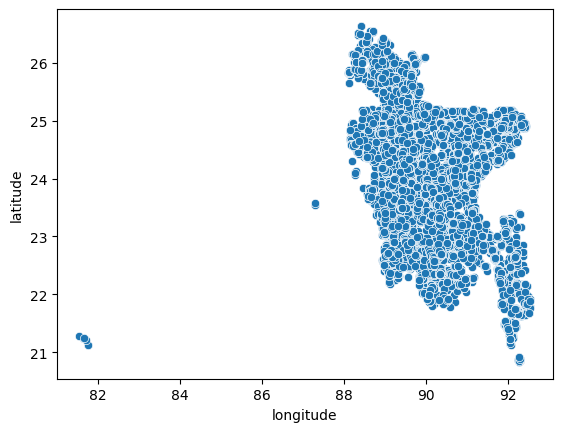

In [144]:
sns.scatterplot(x = 'longitude', y = 'latitude', data = new_df)

In [145]:
percentile25 = new_df['longitude'].quantile(0.25)
percentile75 = new_df['longitude'].quantile(0.75)

In [146]:
iqr = percentile75 - percentile25
iqr

1.6251999999999924

In [147]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [148]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 93.41799999999998
Lower limit 86.91720000000001


In [149]:
new_df[new_df['longitude'] > upper_limit]

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount


In [150]:
new_df[new_df['longitude'] < lower_limit]

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
3523,3524,6,Purkhouti Muktangan,"Sector 24, Uparwara, Chhattisgarh 492101, India",21.1341,81.7589,NaN,Tourist attraction,17867009341441226074,Raipur,historical places,4.2,6000.0
8165,8166,1,Sayesta Nagar Eidgah Maidan,"Sayesta Nagar, Raipur, Lakshmipur, Raipur, India",21.2514,81.6296,NaN,Mosque,4834485748922787336,Raipur,point of interest,NaN,NaN
8166,8167,2,Muksud Ullah Billah,"Hanif-Sorddar Bari, Denayetpur, Raipur-Laxmipu...",21.2514,81.6296,NaN,Housing society,16502012963487615306,Raipur,point of interest,NaN,NaN
12868,12869,4,Purkhouti Muktangan,"Sector 24, Uparwara, Chhattisgarh 492101, India",21.1341,81.7589,NaN,Tourist attraction,17867009341441226074,Raipur,tourist places,4.2,6000.0
12870,12871,6,Nandan Van Zoo,"7GMV 5WM, Atari, Chhattisgarh 492001, India",21.2830,81.5448,NaN,Tourist attraction,12065084524434518262,Raipur,tourist places,3.8,1700.0
12873,12874,9,Energy Park(Urja park),"Fundahar, Chhattisgarh 492012, India",21.2192,81.6976,NaN,Tourist attraction,9036507267885561711,Raipur,tourist places,4.2,6500.0
12874,12875,10,Mahant Ghasidas Memorial Museum,"6JVV HX3, Ghadi Chowk, Raj Bhawan Rd, Civil Li...",21.2439,81.6449,NaN,Tourist attraction,11011223885848552168,Raipur,tourist places,4.4,1000.0


In [151]:
bd = new_df[new_df['longitude'] >lower_limit]

In [152]:
bd

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
0,1,1,বাদলপাড়া (পশ্চিম),Bangladesh,24.0518,89.1778,https://www.google.com/maps/vt/data=Eb3EEOUdHQ...,Historical landmark,11277077186148385091,Atghoria,historical places,NaN,NaN
1,2,2,বাদলপাড়া (পূর্ব),Bangladesh,24.0481,89.1817,https://www.google.com/maps/vt/data=RPJAmOkoUn...,Historical landmark,16459020165021128639,Atghoria,historical places,5.0,1.0
2,3,3,Kalibari Botgach,38XP+84Q,24.0983,89.3354,https://www.google.com/maps/vt/data=N7OAB5zAfC...,Historical place,2351369166351746719,Atghoria,historical places,2.3,7.0
3,4,4,Abdullah House,Bangladesh,24.2182,89.1794,https://lh5.googleusercontent.com/p/AF1QipO1JK...,Historical landmark,4501074247934495919,Atghoria,historical places,NaN,NaN
4,5,5,বাদলপাড়া (দক্ষিণ),Bangladesh,24.0458,89.1786,https://www.google.com/maps/vt/data=cke8kwb6-r...,Historical landmark,14833493039539550355,Atghoria,historical places,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13851,13852,6,সামাদ বাগান গেইট,VCMJ+W9F,24.8848,92.4309,https://www.google.com/maps/vt/data=KlQsJCA4Aq...,Tourist attraction,16001222133479626905,Zakiganj,tourist places,2.0,1.0
13852,13853,7,মেসার্স সাইমা ফার্মেসী,"ঈদগাহ বাজার, মেইন রোড",24.8942,92.3370,https://www.google.com/maps/vt/data=-D9jSqSMAd...,Tourist attraction,13616155051006738111,Zakiganj,tourist places,NaN,NaN
13853,13854,8,India View,V8VV+WQH,24.8948,92.3445,https://lh5.googleusercontent.com/p/AF1QipMmU_...,Tourist attraction,5437753112283764074,Zakiganj,tourist places,2.7,6.0
13854,13855,9,শিংলাফুয়া হাউজ,X96Q+3V7,24.9602,92.3897,https://www.google.com/maps/vt/data=4v6-CoF8K5...,Tourist attraction,15932006156067024314,Zakiganj,tourist places,5.0,1.0


<Axes: xlabel='longitude', ylabel='latitude'>

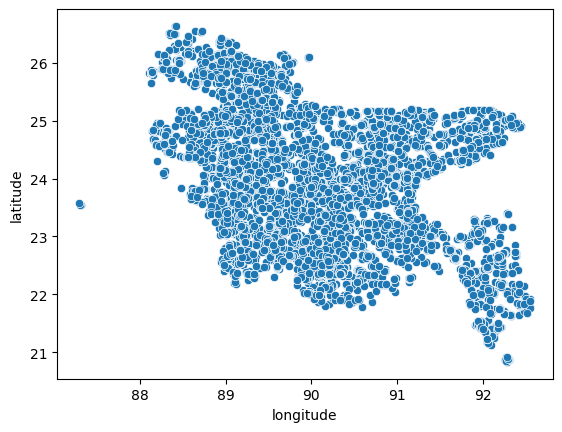

In [153]:
sns.scatterplot(x = 'longitude', y = 'latitude', data = bd)

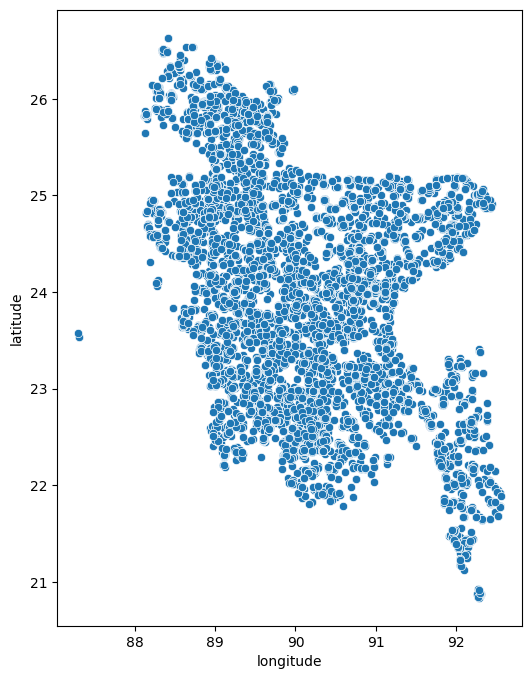

In [154]:
plt.figure(figsize=(6, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', data = bd)
plt.show()

In [155]:
bd['longitude'] >=24

,longitude
0,True
1,True
2,True
3,True
4,True
...,...
13851,True
13852,True
13853,True
13854,True


In [156]:
bd[(bd['longitude'] < 88.5) & (bd['longitude'] > 88) & (bd['latitude'] > 24) & (bd['latitude'] < 24.3)]


,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
3667,3668,2,Gajdharpara More,"Berhampore, West Bengal, India",24.0676,88.2790,https://lh5.googleusercontent.com/p/AF1QipP6_L...,Historical landmark,11257522179420468246,Raninagar,historical places,4.2,220.0
3672,3673,7,Anukul Mistri and Fulmala Mistri Statue,"Berhampore, West Bengal, India",24.1052,88.2902,https://www.google.com/maps/vt/data=fBusjWYS7u...,Historical landmark,2884225838234795401,Raninagar,historical places,NaN,NaN
3673,3674,8,NIL MATH,"Berhampore, West Bengal, India",24.1180,88.2814,https://lh5.googleusercontent.com/p/AF1QipPP2x...,Historical landmark,14266156938753046377,Raninagar,historical places,4.4,67.0
3674,3675,9,PARKER MORE,"Berhampore, West Bengal, India",24.1242,88.2932,https://lh5.googleusercontent.com/p/AF1QipOnzf...,Historical landmark,15455763188232288630,Raninagar,historical places,3.3,4.0
3675,3676,10,Babulbona residency Cemetery,"Berhampore, West Bengal, India",24.0964,88.2639,https://lh5.googleusercontent.com/p/AF1QipN9G3...,Historical landmark,8372635441270941609,Raninagar,historical places,4.5,22.0


In [157]:
bd[bd['address'] == 'Berhampore, West Bengal, India']

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
3667,3668,2,Gajdharpara More,"Berhampore, West Bengal, India",24.0676,88.2790,https://lh5.googleusercontent.com/p/AF1QipP6_L...,Historical landmark,11257522179420468246,Raninagar,historical places,4.2,220.0
3672,3673,7,Anukul Mistri and Fulmala Mistri Statue,"Berhampore, West Bengal, India",24.1052,88.2902,https://www.google.com/maps/vt/data=fBusjWYS7u...,Historical landmark,2884225838234795401,Raninagar,historical places,NaN,NaN
3673,3674,8,NIL MATH,"Berhampore, West Bengal, India",24.1180,88.2814,https://lh5.googleusercontent.com/p/AF1QipPP2x...,Historical landmark,14266156938753046377,Raninagar,historical places,4.4,67.0
3674,3675,9,PARKER MORE,"Berhampore, West Bengal, India",24.1242,88.2932,https://lh5.googleusercontent.com/p/AF1QipOnzf...,Historical landmark,15455763188232288630,Raninagar,historical places,3.3,4.0
3675,3676,10,Babulbona residency Cemetery,"Berhampore, West Bengal, India",24.0964,88.2639,https://lh5.googleusercontent.com/p/AF1QipN9G3...,Historical landmark,8372635441270941609,Raninagar,historical places,4.5,22.0


In [158]:
bd = bd[bd['address'] != 'Berhampore, West Bengal, India']
bd

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
0,1,1,বাদলপাড়া (পশ্চিম),Bangladesh,24.0518,89.1778,https://www.google.com/maps/vt/data=Eb3EEOUdHQ...,Historical landmark,11277077186148385091,Atghoria,historical places,NaN,NaN
1,2,2,বাদলপাড়া (পূর্ব),Bangladesh,24.0481,89.1817,https://www.google.com/maps/vt/data=RPJAmOkoUn...,Historical landmark,16459020165021128639,Atghoria,historical places,5.0,1.0
2,3,3,Kalibari Botgach,38XP+84Q,24.0983,89.3354,https://www.google.com/maps/vt/data=N7OAB5zAfC...,Historical place,2351369166351746719,Atghoria,historical places,2.3,7.0
3,4,4,Abdullah House,Bangladesh,24.2182,89.1794,https://lh5.googleusercontent.com/p/AF1QipO1JK...,Historical landmark,4501074247934495919,Atghoria,historical places,NaN,NaN
4,5,5,বাদলপাড়া (দক্ষিণ),Bangladesh,24.0458,89.1786,https://www.google.com/maps/vt/data=cke8kwb6-r...,Historical landmark,14833493039539550355,Atghoria,historical places,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13851,13852,6,সামাদ বাগান গেইট,VCMJ+W9F,24.8848,92.4309,https://www.google.com/maps/vt/data=KlQsJCA4Aq...,Tourist attraction,16001222133479626905,Zakiganj,tourist places,2.0,1.0
13852,13853,7,মেসার্স সাইমা ফার্মেসী,"ঈদগাহ বাজার, মেইন রোড",24.8942,92.3370,https://www.google.com/maps/vt/data=-D9jSqSMAd...,Tourist attraction,13616155051006738111,Zakiganj,tourist places,NaN,NaN
13853,13854,8,India View,V8VV+WQH,24.8948,92.3445,https://lh5.googleusercontent.com/p/AF1QipMmU_...,Tourist attraction,5437753112283764074,Zakiganj,tourist places,2.7,6.0
13854,13855,9,শিংলাফুয়া হাউজ,X96Q+3V7,24.9602,92.3897,https://www.google.com/maps/vt/data=4v6-CoF8K5...,Tourist attraction,15932006156067024314,Zakiganj,tourist places,5.0,1.0


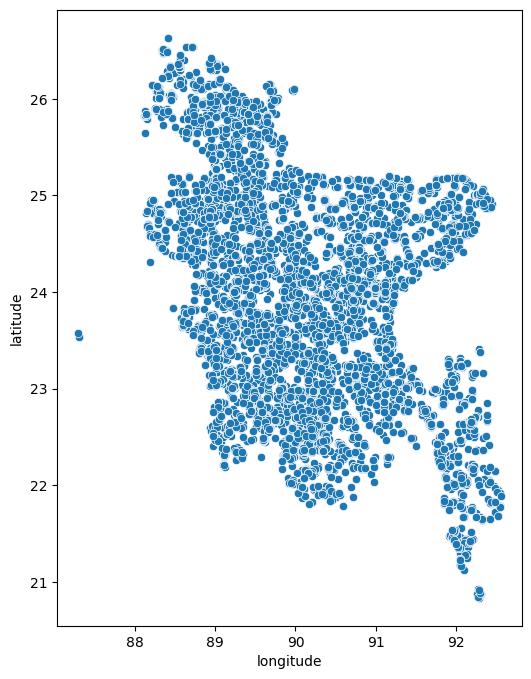

In [159]:
plt.figure(figsize=(6, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', data = bd)
plt.show()

In [160]:
bd[(bd['longitude'] < 88.4) & (bd['longitude'] > 88) & (bd['latitude'] > 25.5) & (bd['latitude'] < 25.8)]


,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
1700,1701,5,রুইলা #তোররা#,Q4RW+C87,25.7910,88.1458,https://lh5.googleusercontent.com/p/AF1QipMyh6...,Historical landmark,13354221312462928261,Haripur,historical places,1.0,1.0
3515,3516,6,আব্দুলঘাটা স্নান ঘাট,"Raiganj, West Bengal, India",25.6450,88.1226,https://lh5.googleusercontent.com/p/AF1QipN57u...,Hindu temple,18188670743548169878,Raigonj,historical places,4.6,8.0
12806,12807,4,Chandaria nakkarha courasta,"Pirganj, Bangladesh",25.7333,88.3569,https://lh5.googleusercontent.com/p/AF1QipOM6X...,Tourist attraction,15534882722158563583,Pirganj,tourist places,5.0,4.0
12864,12865,1,আব্দুলঘাটা স্নান ঘাট,"Unnamed Road, Raiganj, West Bengal 733134, India",25.6450,88.1226,NaN,Hindu temple,18188670743548169878,Raigonj,tourist places,4.6,8.0


In [161]:
bd = bd[bd['address'] != 'Raiganj, West Bengal, India']
bd

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
0,1,1,বাদলপাড়া (পশ্চিম),Bangladesh,24.0518,89.1778,https://www.google.com/maps/vt/data=Eb3EEOUdHQ...,Historical landmark,11277077186148385091,Atghoria,historical places,NaN,NaN
1,2,2,বাদলপাড়া (পূর্ব),Bangladesh,24.0481,89.1817,https://www.google.com/maps/vt/data=RPJAmOkoUn...,Historical landmark,16459020165021128639,Atghoria,historical places,5.0,1.0
2,3,3,Kalibari Botgach,38XP+84Q,24.0983,89.3354,https://www.google.com/maps/vt/data=N7OAB5zAfC...,Historical place,2351369166351746719,Atghoria,historical places,2.3,7.0
3,4,4,Abdullah House,Bangladesh,24.2182,89.1794,https://lh5.googleusercontent.com/p/AF1QipO1JK...,Historical landmark,4501074247934495919,Atghoria,historical places,NaN,NaN
4,5,5,বাদলপাড়া (দক্ষিণ),Bangladesh,24.0458,89.1786,https://www.google.com/maps/vt/data=cke8kwb6-r...,Historical landmark,14833493039539550355,Atghoria,historical places,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13851,13852,6,সামাদ বাগান গেইট,VCMJ+W9F,24.8848,92.4309,https://www.google.com/maps/vt/data=KlQsJCA4Aq...,Tourist attraction,16001222133479626905,Zakiganj,tourist places,2.0,1.0
13852,13853,7,মেসার্স সাইমা ফার্মেসী,"ঈদগাহ বাজার, মেইন রোড",24.8942,92.3370,https://www.google.com/maps/vt/data=-D9jSqSMAd...,Tourist attraction,13616155051006738111,Zakiganj,tourist places,NaN,NaN
13853,13854,8,India View,V8VV+WQH,24.8948,92.3445,https://lh5.googleusercontent.com/p/AF1QipMmU_...,Tourist attraction,5437753112283764074,Zakiganj,tourist places,2.7,6.0
13854,13855,9,শিংলাফুয়া হাউজ,X96Q+3V7,24.9602,92.3897,https://www.google.com/maps/vt/data=4v6-CoF8K5...,Tourist attraction,15932006156067024314,Zakiganj,tourist places,5.0,1.0


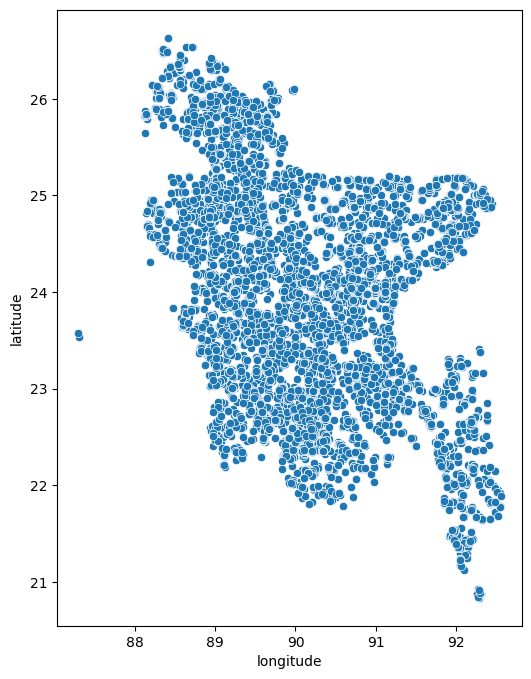

In [162]:
plt.figure(figsize=(6, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', data = bd)
plt.show()

In [163]:
# Display all rows from the DataFrame where 'address' contains 'West Bengal'
west_bengal_rows = bd[bd['address'].str.contains('India', na=False)]

# This will show the filtered DataFrame
west_bengal_rows




,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
1322,1323,9,Historical Tunnel,"713216, Bengal Ambuja Housing Complex, Ambuja,...",23.5389,87.3074,NaN,Historical landmark,11898977339302414500,Durgapur,historical places,4.1,17.0
1609,1610,1,Gauripur Rajbari Main Palace,"3XXG 64G, Gauripur, Assam 783331, India",26.0981,89.9753,NaN,Tourist attraction,3125127858218643948,Gouripur,historical places,4.2,448.0
1610,1611,2,"Hawakhana, Gauripur","3XXG 63X, NH 17, Gauripur, Assam 783331, India",26.0981,89.9752,NaN,Historical landmark,3087121169959786150,Gouripur,historical places,4.6,9.0
1611,1612,3,Gate of Punjaban,"01, Gauripur Bazar Rd, near Mojid, Gauripur, A...",26.0777,89.9644,NaN,Tourist attraction,11475500891161897500,Gouripur,historical places,3.9,13.0
1612,1613,4,Gauripur Rajbari,"3XQ6 W84, Gauripur, Assam 783331, India",26.0902,89.9608,NaN,NaN,7709446158703533776,Gouripur,historical places,NaN,NaN
1613,1614,5,Gouripur Hazi Bari,"854V PJG, Gauripur, West Bengal 742122, India",24.3068,88.1941,NaN,Historical landmark,17283539075290666114,Gouripur,historical places,5.0,2.0
1672,1673,7,ঐতিহাসিক ও প্রাচীন পাঁচবিবি(বাংলাদেশ) সড়ক,"Hili, Basudebpur, West Bengal, India",25.2788,89.0042,https://lh5.googleusercontent.com/p/AF1QipNfrW...,Historical landmark,15026048230976046788,Hakimpur,historical places,3.5,2.0
2201,2202,1,Kasba Kali Bari,"P5Q5 XWR, Kamalasagar, Tripura 799102, India",23.7400,91.1598,NaN,Hindu temple,9824771548470003255,Kasba,historical places,4.6,1500.0
3666,3667,1,রানীনগর ছোট গোয়া ব্রিজ,"Jalpaiguri, West Bengal, India",26.5371,88.6422,https://lh5.googleusercontent.com/p/AF1QipMi6X...,Tourist attraction,11930599254276604072,Raninagar,historical places,4.0,2.0
3668,3669,3,Ramdhinir ghat,"Raninagar, West Bengal, India",24.2916,88.7131,https://www.google.com/maps/vt/data=HE5CC6OjW9...,Historical landmark,10821427854901517938,Raninagar,historical places,NaN,NaN


In [164]:
# Remove rows where 'address' contains 'West Bengal'
bd = bd[~bd['address'].str.contains('India', na=False)]
bd

,id,position,title,address,latitude,longitude,thumbnailUrl,category,cid,upazila_name,search_key,rating,ratingCount
0,1,1,বাদলপাড়া (পশ্চিম),Bangladesh,24.0518,89.1778,https://www.google.com/maps/vt/data=Eb3EEOUdHQ...,Historical landmark,11277077186148385091,Atghoria,historical places,NaN,NaN
1,2,2,বাদলপাড়া (পূর্ব),Bangladesh,24.0481,89.1817,https://www.google.com/maps/vt/data=RPJAmOkoUn...,Historical landmark,16459020165021128639,Atghoria,historical places,5.0,1.0
2,3,3,Kalibari Botgach,38XP+84Q,24.0983,89.3354,https://www.google.com/maps/vt/data=N7OAB5zAfC...,Historical place,2351369166351746719,Atghoria,historical places,2.3,7.0
3,4,4,Abdullah House,Bangladesh,24.2182,89.1794,https://lh5.googleusercontent.com/p/AF1QipO1JK...,Historical landmark,4501074247934495919,Atghoria,historical places,NaN,NaN
4,5,5,বাদলপাড়া (দক্ষিণ),Bangladesh,24.0458,89.1786,https://www.google.com/maps/vt/data=cke8kwb6-r...,Historical landmark,14833493039539550355,Atghoria,historical places,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13851,13852,6,সামাদ বাগান গেইট,VCMJ+W9F,24.8848,92.4309,https://www.google.com/maps/vt/data=KlQsJCA4Aq...,Tourist attraction,16001222133479626905,Zakiganj,tourist places,2.0,1.0
13852,13853,7,মেসার্স সাইমা ফার্মেসী,"ঈদগাহ বাজার, মেইন রোড",24.8942,92.3370,https://www.google.com/maps/vt/data=-D9jSqSMAd...,Tourist attraction,13616155051006738111,Zakiganj,tourist places,NaN,NaN
13853,13854,8,India View,V8VV+WQH,24.8948,92.3445,https://lh5.googleusercontent.com/p/AF1QipMmU_...,Tourist attraction,5437753112283764074,Zakiganj,tourist places,2.7,6.0
13854,13855,9,শিংলাফুয়া হাউজ,X96Q+3V7,24.9602,92.3897,https://www.google.com/maps/vt/data=4v6-CoF8K5...,Tourist attraction,15932006156067024314,Zakiganj,tourist places,5.0,1.0


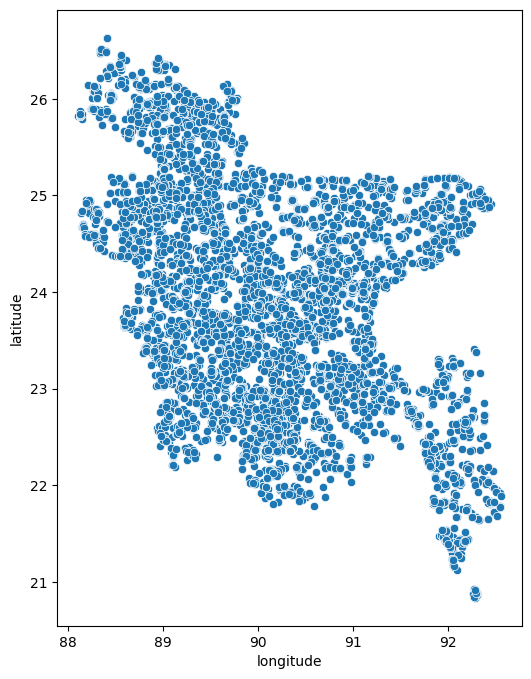

In [165]:
plt.figure(figsize=(6, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', data = bd)
plt.show()